# Predictive Maintenance of Jet engine

**Business Problem:**

Maintenance costs and machine availability are two of the most important concerns in aviation industry.

Commercial aircraft maintenance cost can be divided into three main areas; airframe, engines, and components.Of these three costs, engine maintenance expenditures will often represent the most significant, and consequently will have an important impact to the market value of the entire aircraft at any given time.

But think of a complex system with some very expensive parts. You can’t really risk running it to failure, as it will be extremely costly to repair highly damaged parts. But, more importantly, it’s a safety issue.

That’s why many organizations try to prevent failure before it occurs by performing regular checks on their equipment.One big challenge with preventive maintenance is determining when to do maintenance. Since you don’t know when failure will occur, you have to be conservative in your planning, especially if you’re operating safety-critical equipment. But by scheduling maintenance very early, you’re wasting machine life that is still usable, and this adds to your costs. However, if you can predict when machine failure will occur, you can schedule maintenance right before it.

It also pinpoints problems in your complex machinery and helps you identify what parts need to be fixed. This way, you can minimize downtime and maximize equipment lifetime.


**Problem statement:**

The objective of the competition is to predict the number of
remaining operational cycles before it failure.

To predictive failure of machinery we need to know **(RUL) Remaining useful life** (the length of time a machine is likely to operate before it requires repair or replacement).

For example, let consider the engine one life cycle data.In a training data life cycle of engine start from 1- 223. Upto 223 life cycle engine is normally operating,behind this limit engine complete degradation(we can't use this engine). we need find out how much time we have 



**Business Problem:**

Maintenance costs and machine availability are two of the most important concerns in aviation industry.

Commercial aircraft maintenance cost can be divided into three main areas; airframe, engines, and components.Of these three costs, engine maintenance expenditures will often represent the most significant, and consequently will have an important impact to the market value of the entire aircraft at any given time.

But think of a complex system with some very expensive parts. You can’t really risk running it to failure, as it will be extremely costly to repair highly damaged parts. But, more importantly, it’s a safety issue.

That’s why many organizations try to prevent failure before it occurs by performing regular checks on their equipment.One big challenge with preventive maintenance is determining when to do maintenance. Since you don’t know when failure will occur, you have to be conservative in your planning, especially if you’re operating safety-critical equipment. But by scheduling maintenance very early, you’re wasting machine life that is still usable, and this adds to your costs. However, if you can predict when machine failure will occur, you can schedule maintenance right before it.

It also pinpoints problems in your complex machinery and helps you identify what parts need to be fixed. This way, you can minimize downtime and maximize equipment lifetime.


**Problem statement:**

The objective of the competition is to predict the number of
remaining operational cycles before it failure.

To predictive failure of machinery we need to know **(RUL) Remaining useful life** (the length of time a machine is likely to operate before it requires repair or replacement).

For example, let consider the engine one life cycle data.In a training data life cycle of engine start from 1- 223. Upto 223 life cycle engine is normally operating,behind this limit engine complete degradation(we can't use this engine). we need find out how much time we have 



**Real-world/Business objectives and constraints**

- No low-latency requirement(It should fininsh in a few minute or hours).
- Interpretability is not a important (if you can proved good accuray).
- Minimize RMSE and score-based evaluation matrix error.

**Machine Learning Problem Formulation**




Predictive maintenance can be formulated in one of the two ways:


1.   Remaining useful life estimation, which aims to estimate the remaining time to the end of equipment’s useful life
2.   failure prediction, which aims to predict
the probability that the equipment will fail within a prespecified time window

we focus on the remaining useful life estimation (RUL) problem.



**Performance Metric**



- **Root mean squared error (RMSE):**  $d=RUL_{true}- RUL_{est}$ and N engines


$RMSE = \sqrt{\frac{1}{N}\displaystyle\sum_{i=1}^{N} d}$

- **Score-based evaluation function**

The final score is a weighted sum of RUL errors.
The scoring function is an asymmetric function
that penalizes late predictions more than the early
predictions.


$ f(x)= \begin{cases} \displaystyle\sum_{i=1}^{N} (e^{-(\frac{d}{a_1})}-1)&{\text{if }}d<0, \\ \displaystyle\sum_{i=1}^{N} (e^{(\frac{d}{a_2})}-1) & else. \end{cases} $

where,
f(x) is the computed score,

N is the number of unites ,

$ a_1 = 13,$ and $ a_2 = 10 $.

**Relevent dataset**

Data from the data challenge competition held at the 1st international conference on Prognostics and Health Management (PHM08) is being made publicly available.

[Download PHM08 Challenge Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)

Data sets consist of multiple multivariate time series. Each data set is further divided into training and test subsets. 

Data set consists of three operational settings and 21  sensor measurements (temperature, pressure, fan speed, etc.) for several engines and for every cycle of their lifetime. 

The data are contaminated with sensor noise.The engine is operating normally at the start of each time series, and starts to degrade at some point during the series. 


**load library**

In [250]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install sweetviz 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=5ac28d2c60ea2ec1781777e21525ca3e119a8a3428e4767d9a265cd3d0bbec52
  Stored in directory: /tmp/pip-ephem-wheel-cache-6vrnehb5/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [251]:
!pip install joypy

In [252]:
import numpy as np
import pandas as pd
#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 
from math import log, exp, sqrt   # import some useful mathematical stuff 
from pandas_profiling import ProfileReport
import pandas_profiling 
import warnings
warnings.filterwarnings("ignore")
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline 
from joypy import joyplot

In [253]:
%cd /content/drive/My Drive/Self Case Study 1/data

/content/drive/My Drive/Self Case Study 1/data


**Schematic diagram showing the components and station numbers of the C-MAPSS engine**

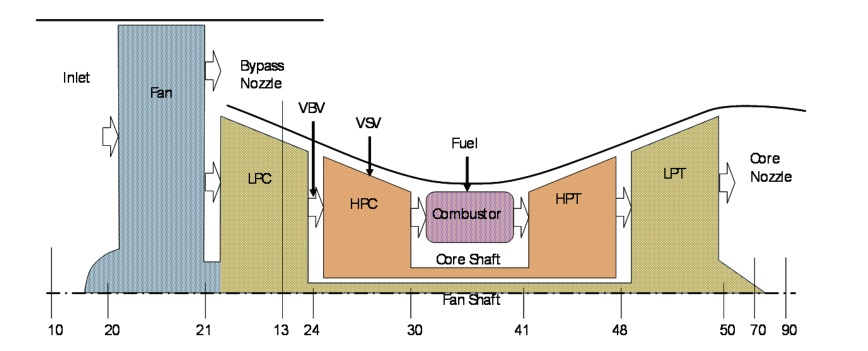

In [254]:
from IPython.display import Image
Image(filename='C-MAPSS.jpg') 

- **Acronyms and its description**

In [255]:
colnames = pd.read_csv('colms.txt',sep = ',', names=['Variable_name','Description','Units'])  
colnames

,Variable_name,Description,Units
0,T2,Total temperature at fan inlet,°R
1,T24,Total temperature at LPC outlet,°R
2,T30,Total temperature at HPC outlet,°R
3,T50,Total temperature at LPT outlet,°R
4,P2,Pressure at fan inlet,psia
5,P15,Total pressure in bypass-duct,psia
6,P30,Total pressure at HPC outlet,psia
7,Nf,Physical fan speed,rpm
8,Nc,Physical core speed,rpm
9,epr,Engine pressure ratio,(P50/P2)



https://nptel.ac.in/content/storage2/courses/101101002/downloads/Lect-08.pdf



The engine is operating normally at the start of each time series, and starts to degrade at some point during the series.

In the training set, we have engine degradation grows until a predefined threshold is reached beyond which it is not preferable to operate the engine.

In the test set, the time series ends some time prior to complete degradation.

For example, let consider the engine one life cycle data.In a training data life cycle of engine start from 1- 223. Upto 223 life cycle engine is normally operating,behind this limit engine complete degradation(we can't use this engine). 


- **load train dataset**

In the training set, the fault grows in magnitude until system failure.

In [256]:
index_columns_names =  ["Engine_No","Time_in_cycles"] 
operational_settings_columns_names = ['Altitude','Mach_number','TRA'] 
sensor_measure_columns_names = ['T2','T24','T30', 'T50', 'P2','P15','P30', 'Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','fuel_air_ratio','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

data_path= 'https://raw.githubusercontent.com/Ali-Alhamaly/Turbofan_usefull_life_prediction/master/Data/Simulation_Data/train_FD002.txt'
df_train = pd.read_csv(data_path,delim_whitespace=True,names=input_file_column_names) 
df_train['Altitude']= df_train['Altitude'].apply(lambda x: x*1000*0.3048) # convert killo feet to meters
df_train['T2'] = df_train['T2'].apply(lambda x: x*0.555556)  #convert temperature Rankine to Kelvin
df_train['T24'] = df_train['T24'].apply(lambda x: x*0.555556) #convert temperature Rankine to Kelvin
df_train['T30'] = df_train['T30'].apply(lambda x: x*0.555556) #convert temperature Rankine to Kelvin
df_train['T50'] = df_train['T50'].apply(lambda x: x*0.555556) #convert temperature Rankine to Kelvin 
df_train['P2']  = df_train['P2'].apply(lambda x: x*0.0689476) # convert pressure psia to bar
df_train['P15']  = df_train['P15'].apply(lambda x: x*0.0689476) # convert pressure psia to bar
df_train['P30']  = df_train['P30'].apply(lambda x: x*0.0689476) # convert pressurepsia to bar
df_train['Ps30']  = df_train['Ps30'].apply(lambda x: x*0.0689476) # convert pressure to bar 

mean of life cycle of engines 206.76538461538462 
maximum of life cycle of engines 378 
minimum of life cycle of engines 128 


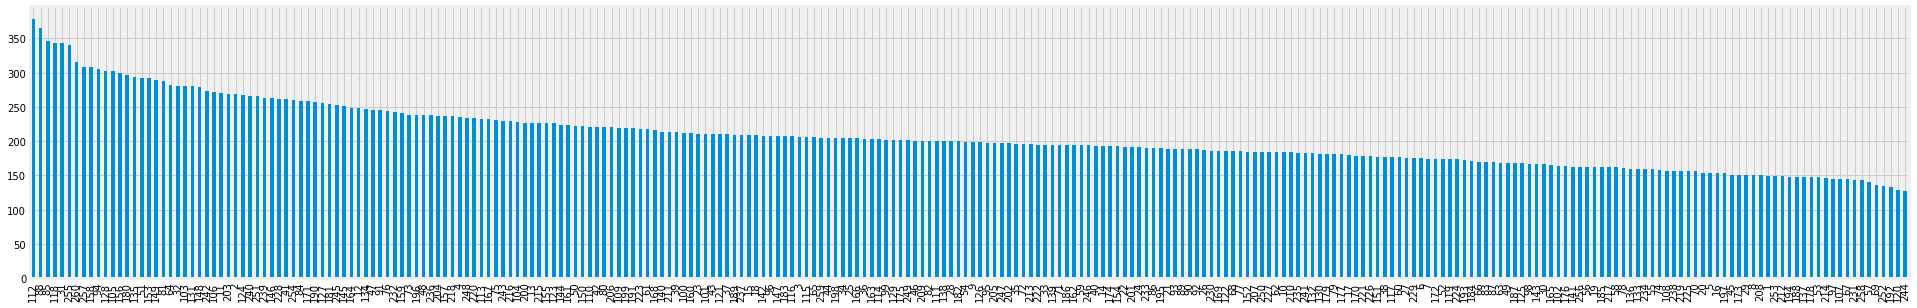

In [257]:
df_train.Engine_No.value_counts().plot.bar(figsize=(30,5)) 
print("mean of life cycle of engines {} ".format(df_train.Engine_No.value_counts().mean()))
print("maximum of life cycle of engines {} ".format(df_train.Engine_No.value_counts().max()))
print("minimum of life cycle of engines {} ".format(df_train.Engine_No.value_counts().min())) 

Engines have different life durations. The average working time in train data is 206 cycles with a minimum of 128 and a maximum of 362.

- **load test dataset** 

In the test set, the time series ends some time prior to system failure (current cycles). 

In [258]:
data_path= 'test_FD002.txt'
df_Test = pd.read_csv(data_path,delim_whitespace=True,names=input_file_column_names) 
df_Test['Altitude']= df_Test['Altitude'].apply(lambda x: x*1000*0.3048) # convert killo feet to meters
df_Test['T2'] = df_Test['T2'].apply(lambda x: x*0.555556)  #Rankine to Kelvin
df_Test['T24'] = df_Test['T24'].apply(lambda x: x*0.555556) #Rankine to Kelvin
df_Test['T30'] = df_Test['T30'].apply(lambda x: x*0.555556) #Rankine to Kelvin
df_Test['T50'] = df_Test['T50'].apply(lambda x: x*0.555556) #Rankine to Kelvin
df_Test['P2']  = df_Test['P2'].apply(lambda x: x*0.0689476) # convart psia to bar
df_Test['P15']  = df_Test['P15'].apply(lambda x: x*0.0689476) # convart psia to bar
df_Test['P30']  = df_Test['P30'].apply(lambda x: x*0.0689476) # convart psia to bar
df_Test['Ps30']  = df_Test['Ps30'].apply(lambda x: x*0.0689476) # convart psia to bar 

- **load true RUL cycles data**

Actual RUL cycles of that engine


In [259]:
truth_df = pd.read_csv('RUL_FD002.txt',delim_whitespace=True, header=None)
truth_df.columns = ['RUL'] 

**Generate RUL for Train data**

In [260]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(df_train.groupby('Engine_No')['Time_in_cycles'].max()).reset_index()
rul.columns = ['Engine_No', 'max_No_cycles']
train = df_train.merge(rul, on=['Engine_No'], how='left')
train['RUL'] = train['max_No_cycles'] - train['Time_in_cycles']

**Generate RUL for test data**

In [261]:
# generate column max for test data
rul = pd.DataFrame(df_Test.groupby('Engine_No')['Time_in_cycles'].max()).reset_index()
rul.columns = ['Engine_No', 'max_No_cycles'] 
truth_df['Engine_No'] = truth_df.index + 1
truth_df['max_No_cycles'] = rul['max_No_cycles'] + truth_df['RUL']
truth_df.drop('RUL', axis=1, inplace=True) 

# generate RUL for test data
Test = df_Test.merge(truth_df, on=['Engine_No'], how='left')
Test['RUL'] = Test['max_No_cycles'] - Test['Time_in_cycles'] 

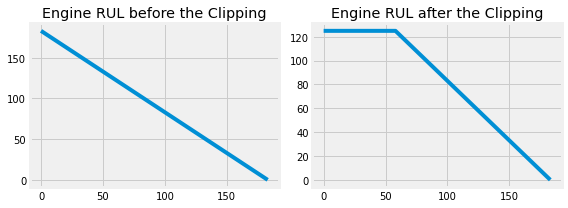

In [262]:
#rul_clip_limit
rul_clip_limit = 125
y_train= train[train['Engine_No']==10].RUL.reset_index(drop=True) 
y_train_clip= y_train.clip(upper =rul_clip_limit) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
axes[0].plot(y_train)
axes[0].set_title('Engine RUL before the Clipping')
axes[1].plot(y_train_clip)
axes[1].set_title('Engine RUL after the Clipping')
fig.tight_layout() 

In [263]:
lst = [1,2]

# Exploratory Data Analysis

- **Cycles**

In [264]:
#calculating 0-100th percentile to find a the correct percentile value.
for i in range(0,100,10):
    var =train["max_No_cycles"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1]) 

0 percentile value is 128
10 percentile value is 159
20 percentile value is 176
30 percentile value is 188
40 percentile value is 197
50 percentile value is 206
60 percentile value is 220
70 percentile value is 237
80 percentile value is 260
90 percentile value is 292
100 percentile value is  378


 90 percent of engines are with in 300 life cycle.

In [265]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers
for i in range(91,100,1):
    var = train["max_No_cycles"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1]) 

91 percentile value is 294
92 percentile value is 297
93 percentile value is 303
94 percentile value is 306
95 percentile value is 309
96 percentile value is 316
97 percentile value is 343
98 percentile value is 347
99 percentile value is 365
100 percentile value is  378


only 8 engines lived above 300 life cycles,this engines we consider as extreme case.

- **Operational Setting**

In [266]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =train["Altitude"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1]) 

0 percentile value is 0.0
10 percentile value is 0.6096
20 percentile value is 3048.3962400000005
30 percentile value is 3050.4384
40 percentile value is 6097.40208
50 percentile value is 7620.39624
60 percentile value is 7622.4384
70 percentile value is 10669.43256
80 percentile value is 12801.56952
90 percentile value is 12802.8192
100 percentile value is  12804.038400000001


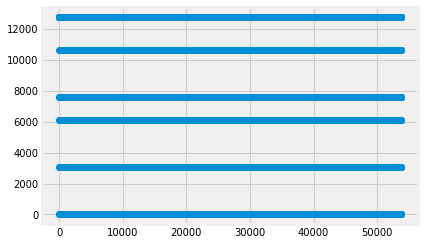

In [267]:
plt.scatter(train.index,train['Altitude'])
plt.show()

all engine are operated in with in range 0-12000 meaters.

In [268]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =train["Mach_number"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.0007
20 percentile value is 0.25
30 percentile value is 0.252
40 percentile value is 0.6207
50 percentile value is 0.7
60 percentile value is 0.702
70 percentile value is 0.84
80 percentile value is 0.84
90 percentile value is 0.841
100 percentile value is  0.842


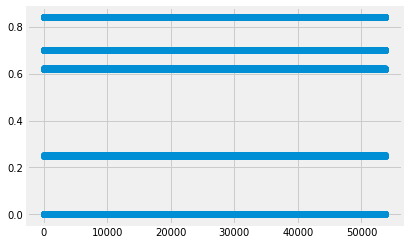

In [269]:
plt.scatter(train.index,train['Mach_number'])
plt.show()

all engine are operated in 0-0.842 mach number(speed) only

In [270]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =train["TRA"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 60.0
10 percentile value is 60.0
20 percentile value is 100.0
30 percentile value is 100.0
40 percentile value is 100.0
50 percentile value is 100.0
60 percentile value is 100.0
70 percentile value is 100.0
80 percentile value is 100.0
90 percentile value is 100.0
100 percentile value is  100.0


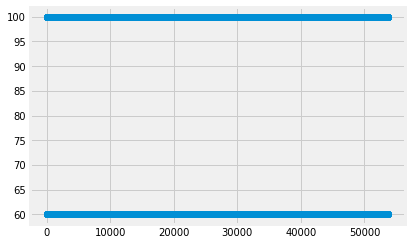

In [271]:
plt.scatter(train.index,train['TRA'])
plt.show()

- As the percentile and plots illustrates, data set having six different flight conditions were simulated that comprised of a range of values for three
operational conditions: altitude (0–12000M.), Mach number (0–0.84), and throttle resolver angle (TRA) (60–100).

The values for operational_setting 1-3(Altitude,Mach_number,TRA)are continuous but create an implicit relation between different engines. If two engines have a similar operational_setting, it could indicate that we should expect the sensor measurements to mean similar things. We make clusters of those settings using KMeans from scikit-learn and make a new entity from the clusters.

In [272]:
from sklearn.cluster import KMeans
from typing import Tuple

clustering = KMeans(n_clusters=6, random_state=42,n_jobs=-1)
clustering.fit(df_train) 
# apply the labels
train_labels = clustering.labels_ 
X_train_clstrs = df_train.copy()
X_train_clstrs['clusters'] = train_labels 

# predict labels on the test set
test_labels = clustering.predict(df_Test)
X_test_clstrs = df_Test.copy()
X_test_clstrs['clusters'] = test_labels 

- number of times engine is operated in condations may effects RUL of engine. 

Splitting of data means larger chances of overfitting and miscalculating probabilities. Because of this, we must attempt to merge our clusters together to have a better chance of understanding.

In [273]:
df= X_train_clstrs.groupby(['Engine_No','clusters'],as_index=False)['Altitude'].agg('count')

In [274]:
train.groupby('Engine_No')['RUL'].count().nlargest()

Engine_No
112    378
88     365
85     347
118    344
31     343
Name: RUL, dtype: int64

In [275]:
train.groupby('Engine_No')['RUL'].count().nsmallest()

Engine_No
244    128
120    129
192    133
252    135
69     136
Name: RUL, dtype: int64

In [276]:
df[df['Engine_No']==76]

,Engine_No,clusters,Altitude
450,76,0,44
451,76,1,38
452,76,2,60
453,76,3,36
454,76,4,28
455,76,5,38


In [277]:
df[df['Engine_No']==5]

,Engine_No,clusters,Altitude
24,5,0,18
25,5,1,27
26,5,2,33
27,5,3,27
28,5,4,28
29,5,5,21


- we can't  differentiate engines based on engine operationalconditions when engine with Min life cycle or Max life cycles.

**sensors data**

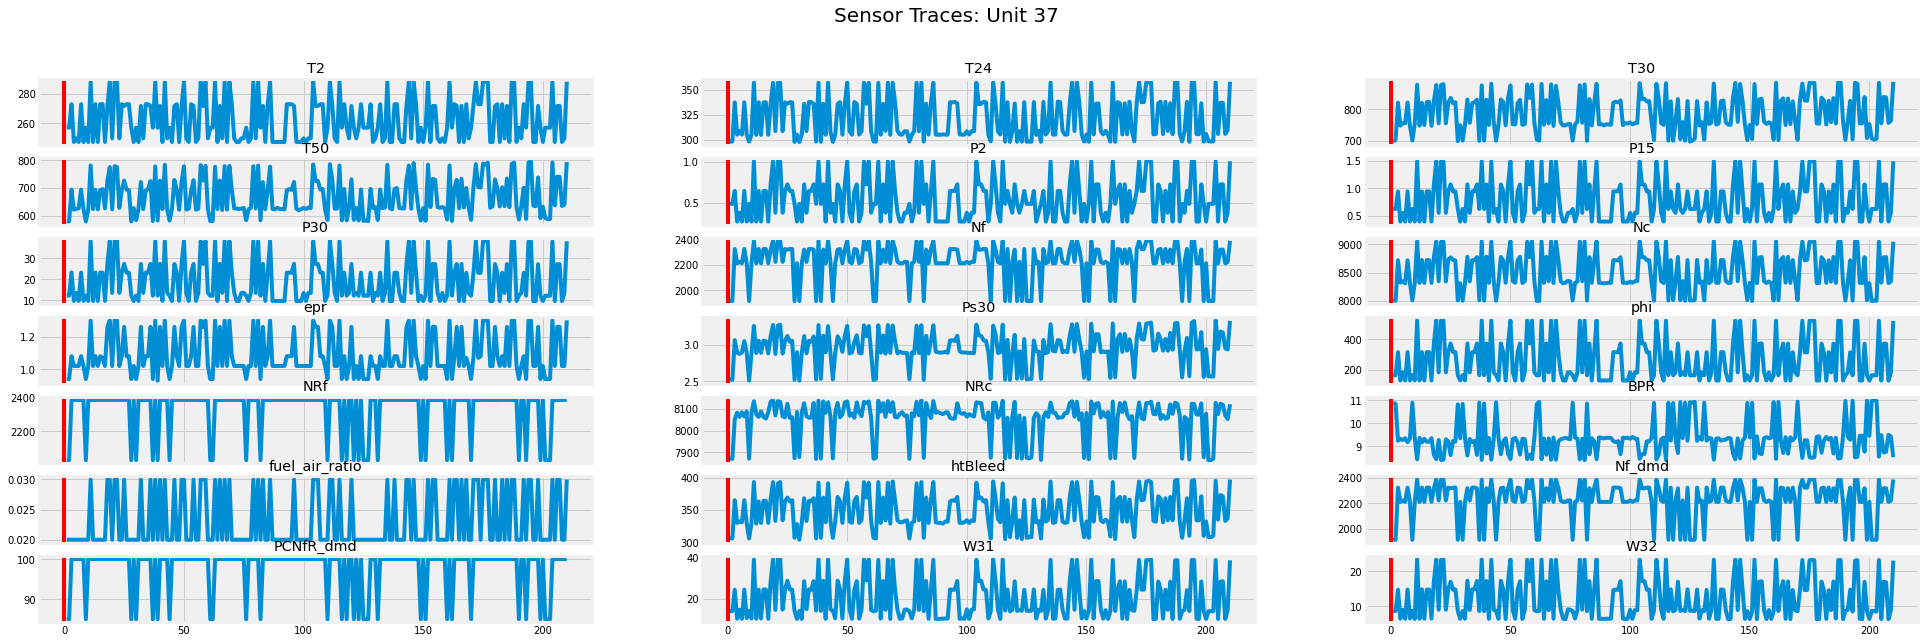

In [278]:
fig,ax=plt.subplots(7,3,figsize=(30,10),sharex=True)
df_u1=train.query('Engine_No==37').drop(['Engine_No','Altitude','Mach_number','TRA','max_No_cycles','RUL'], axis=1)
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.Time_in_cycles.values,df_u1[df_u1.columns[c+1]])
        ax[i,j].set_title(df_u1.columns[c+1])
        ax[i,j].axvline(0,c='r')
        c+=1
plt.suptitle('Sensor Traces: Unit 37',fontsize=20)
plt.show()

- sensors data remain same throughout engine's life.
- we understand that sensors data T2,T24,T30,T50,P2,P15,P30 highly correlated with one another (because temperature graph look like sames).
- sensors NRf and PCNRfr_dmd correlated and also W31 and W32


**Perform EDA Using Pandas Profiling**

In [279]:
df_2= train[train['Engine_No'] == 31]. drop(['Time_in_cycles','RUL'],  axis = 1).set_index('Engine_No')  # for simplicity, consider only max life cycle

In [280]:
### To Create the Simple report quickly 
profile_report  = ProfileReport(df_2, title='Pandas Profiling Report',  correlations={"pearson": {"calculate": True},"spearman": {"calculate": False},"kendall": {"calculate": False},"phi_k": {"calculate": False},"cramers": {"calculate": False},},minimal=True, explorative=True)
profile_report 

In [281]:
profile_report.to_file("pandas_profile_eda.html") 

- we understand that sensors data T2,T24,T30,T50,P2,P15,P30 highly correlated with one another.
- sensors NRf and PCNRfr_dmd correlated and also W31 and W32
- As we can see, all the sensors data is higly correlated. even data is highly correlated we are keeping this features. 

- Let´s have a look at the number of cycles the engines run before a failure.

In [282]:
group_df = train[(train.Engine_No	<=10) & (train.RUL <=50)].groupby('Engine_No', as_index = False).apply(lambda x: x.reset_index(drop = True)).reset_index()
group_df = group_df.drop(['level_0','Altitude','Mach_number','TRA','Time_in_cycles','max_No_cycles'],axis = 1).set_index('level_1')
group_df.head() 

,Engine_No,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,fuel_air_ratio,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
level_1,,,,,,,,,,,,,,,,,,,,,,,
0,1,271.694662,336.094713,833.995112,727.528360,0.725329,1.068688,27.151565,2319.04,8763.64,1.26,3.145390,371.05,2388.25,8119.05,8.6636,0.03,369,2319,100.0,28.53,17.1145,50
1,1,272.883552,337.555826,826.906217,699.506115,0.644660,0.941824,23.018156,2323.93,8704.26,1.08,3.090921,314.17,2388.06,8048.36,9.2490,0.03,367,2324,100.0,24.51,14.6742,49
2,1,247.222420,305.550244,749.711711,630.767171,0.269585,0.394380,9.540279,2211.56,8308.89,1.02,2.908899,130.44,2387.62,8066.89,9.3842,0.02,330,2212,100.0,10.50,6.4038,48
3,1,249.689089,308.833580,764.811723,632.950506,0.377833,0.551581,13.389624,2222.67,8342.95,1.02,2.908899,182.22,2387.77,8059.02,9.3595,0.02,334,2223,100.0,14.86,8.8523,47
4,1,272.883552,337.400270,831.050665,699.089448,0.644660,0.941824,23.054698,2323.93,8704.52,1.08,3.068858,314.23,2388.13,8045.91,9.2488,0.03,366,2324,100.0,24.22,14.7405,46


In [283]:
#https://github.com/archd3sai/Aircraft-Engine-RUL-Prediction/blob/master/Data%20Wrangling.ipynb
fig, ax = plt.subplots(figsize = (25,40), ncols = 3, nrows = 7)
ax = ax.ravel()
for i, feat in enumerate(group_df.columns[1:-1].tolist()):
    group_df.groupby('Engine_No')[feat].plot(kind = "line", ax = ax[i])
    ax[i].set_title(feat)

Output hidden; open in https://colab.research.google.com to view.

- sensor measurements seems having no difference between different engines(random) even in last 50 life cycle before it failure. which might not be helpful for our analysis.

- Let plot **pdf and cdf** plot individual sensor for first five engine.

In [284]:
df = train[train['Engine_No']<=5]

In [285]:
df.groupby('Engine_No')['RUL'].count().nlargest()

Engine_No
2    269
4    235
3    206
5    154
1    149
Name: RUL, dtype: int64

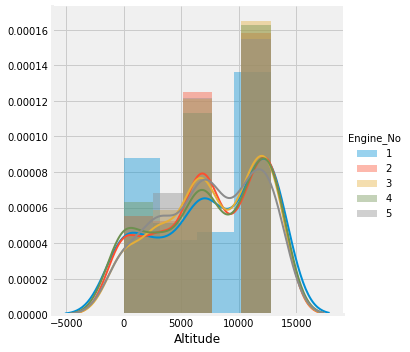

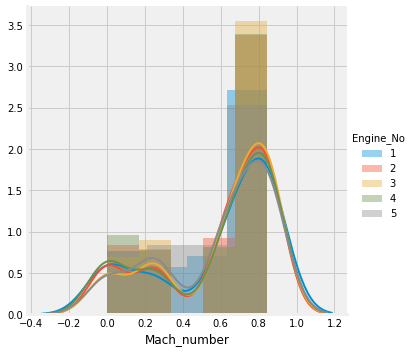

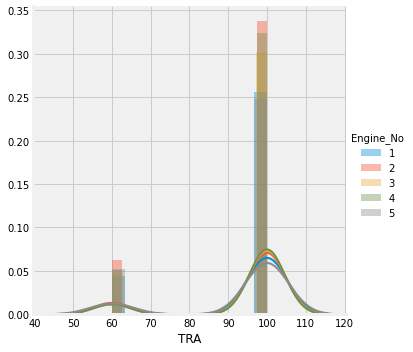

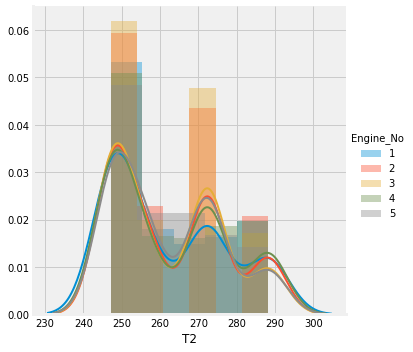

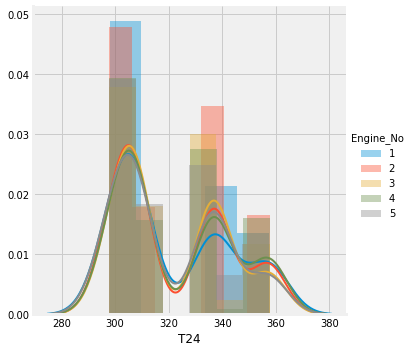

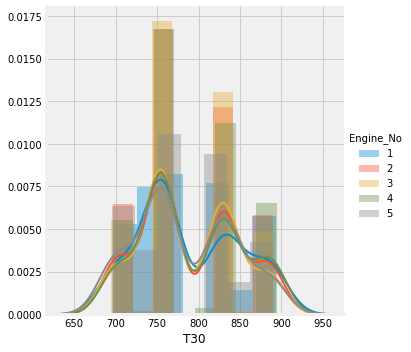

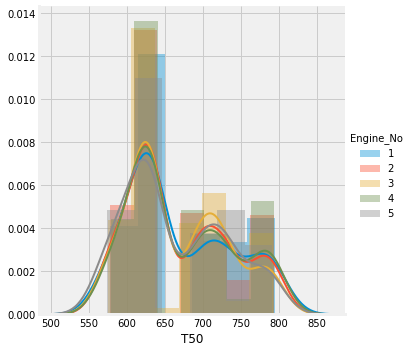

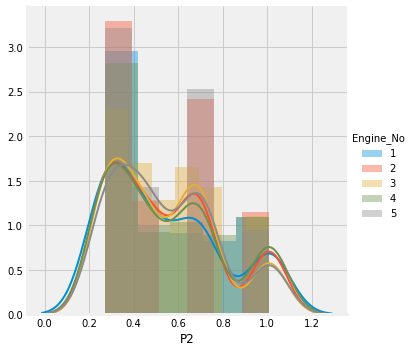

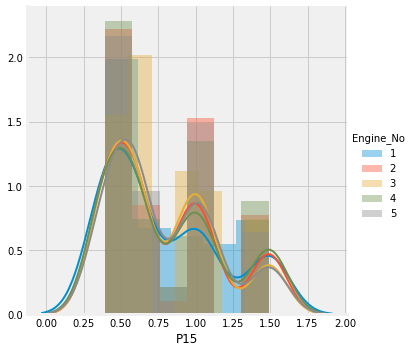

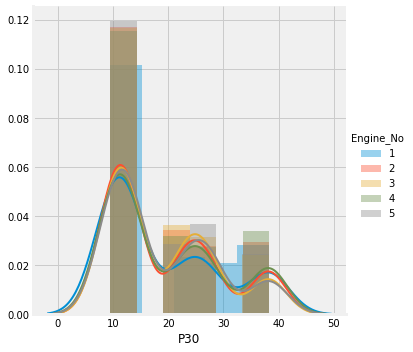

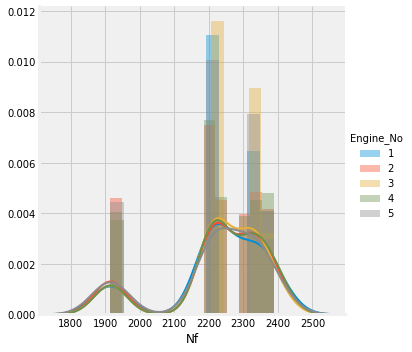

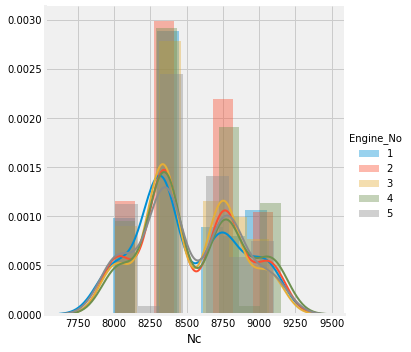

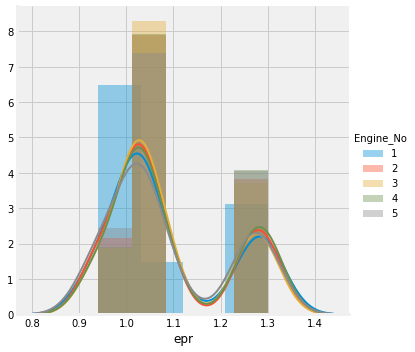

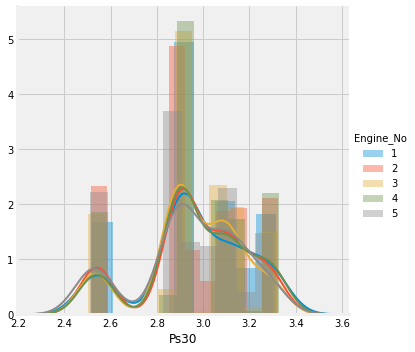

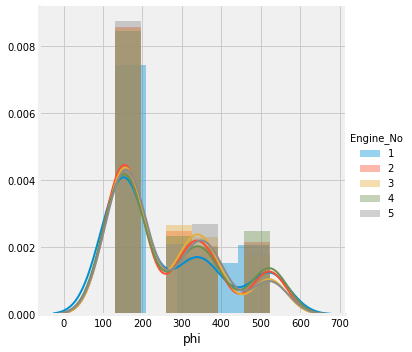

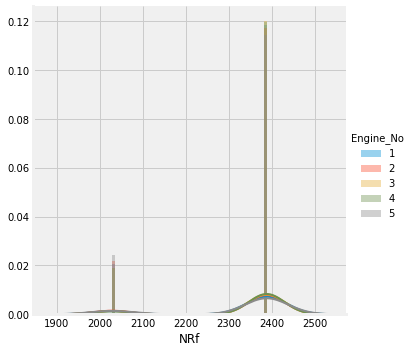

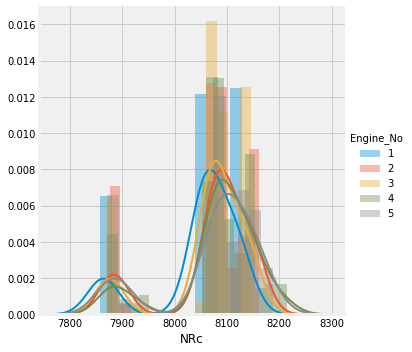

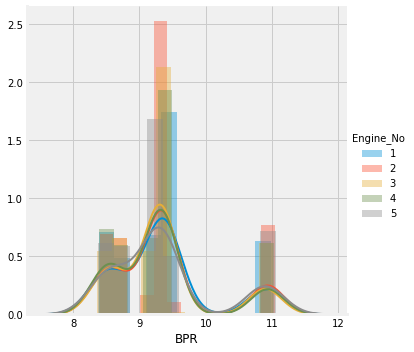

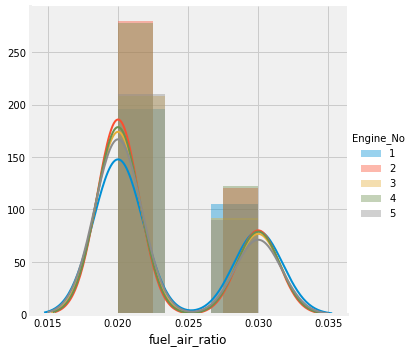

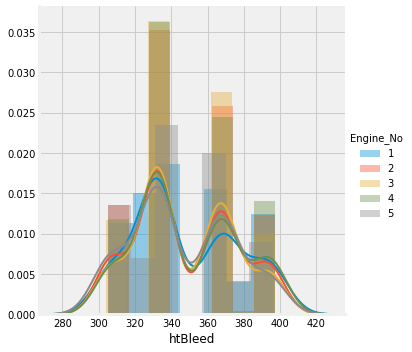

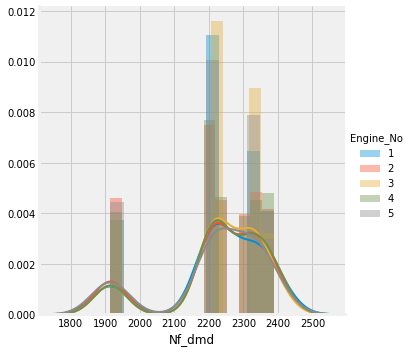

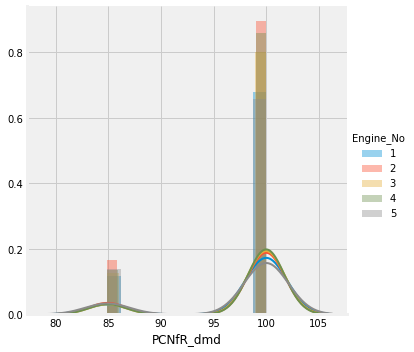

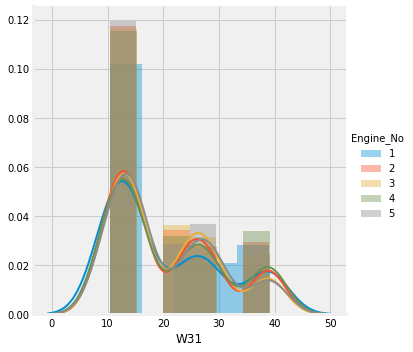

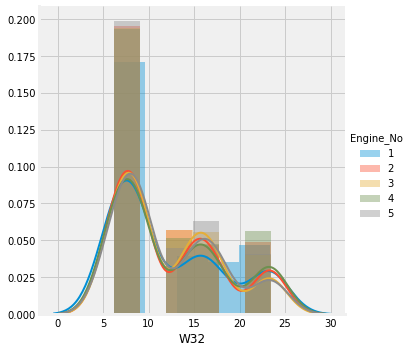

In [286]:
# plotting distribution plot for all features
for idx, feature in enumerate(list(df.columns)[2:-2]):
  fg = sns.FacetGrid(df, hue='Engine_No', size=5,sharey=False,sharex=False)
  fg.map(sns.distplot, feature,kde_kws={'linewidth':2}).add_legend() 
  plt.show() 

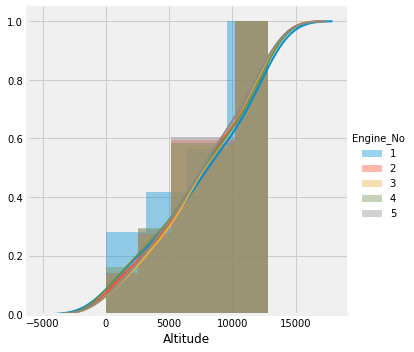

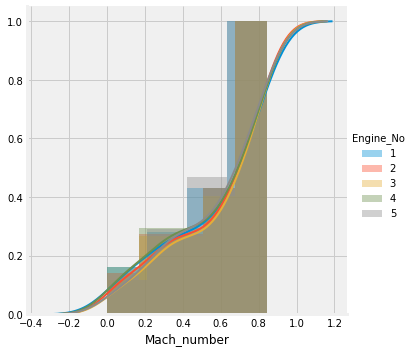

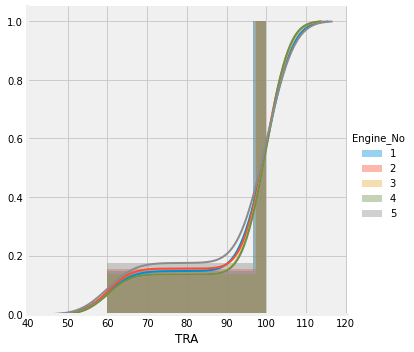

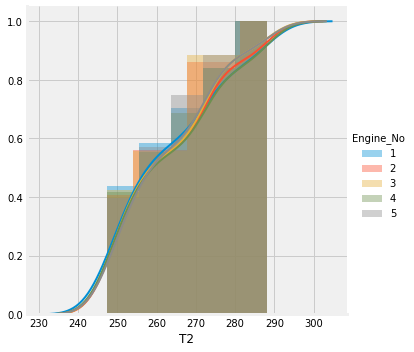

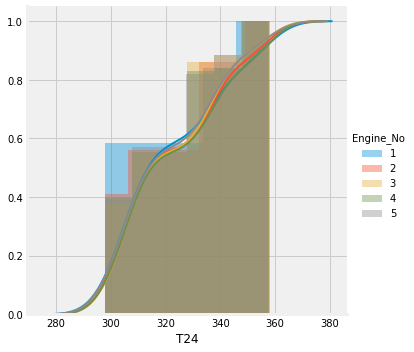

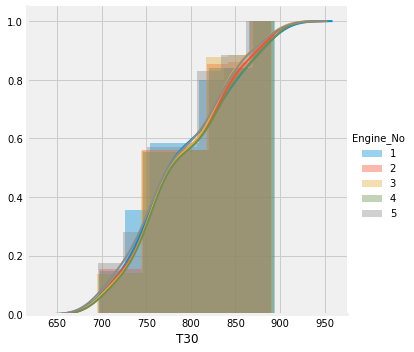

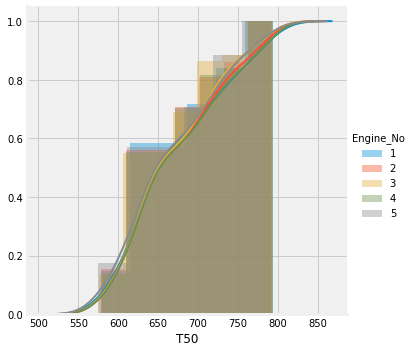

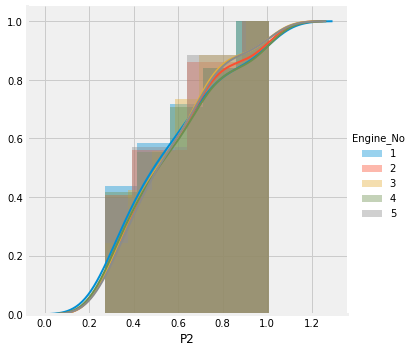

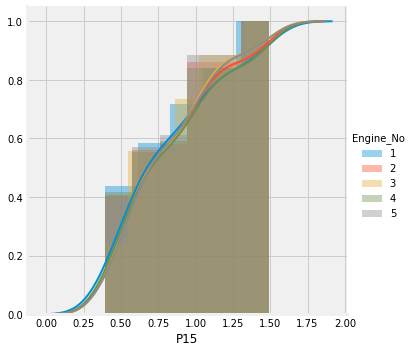

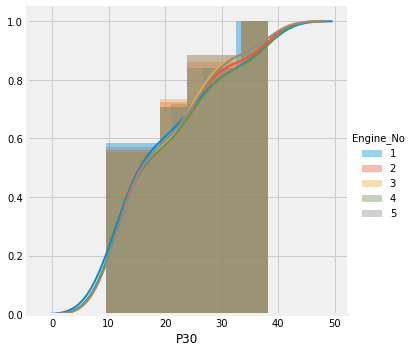

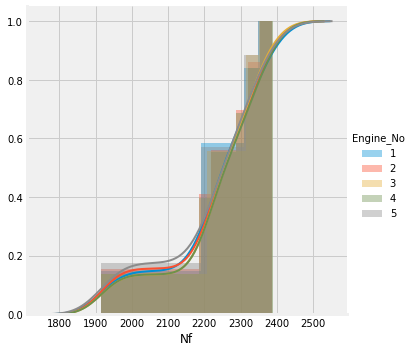

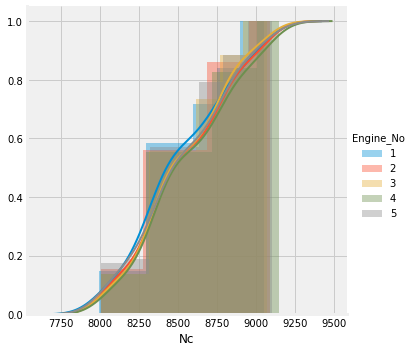

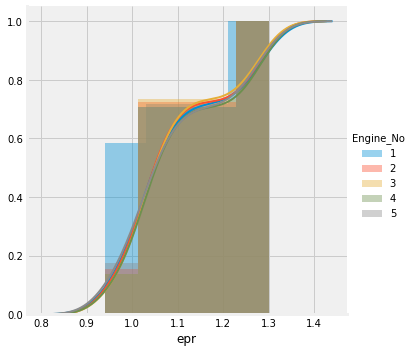

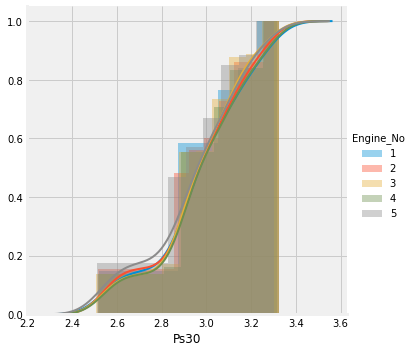

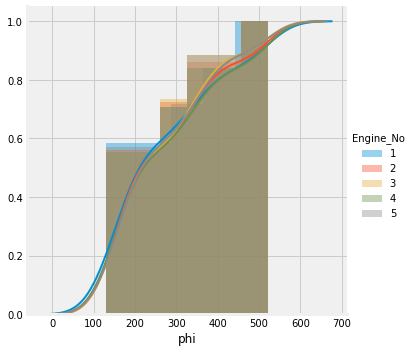

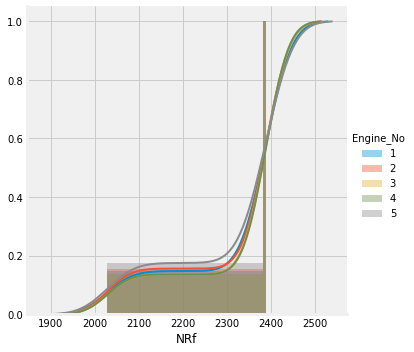

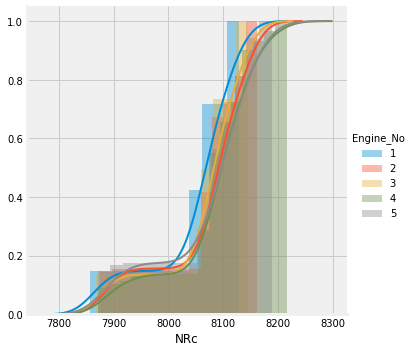

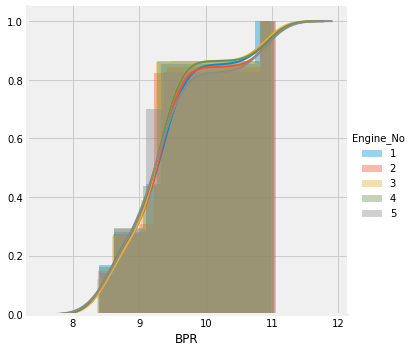

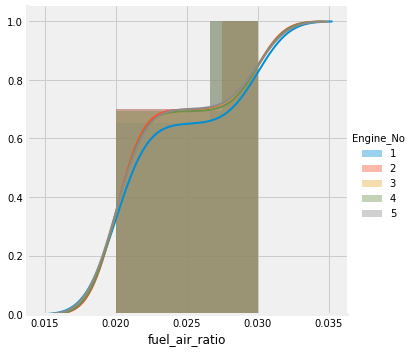

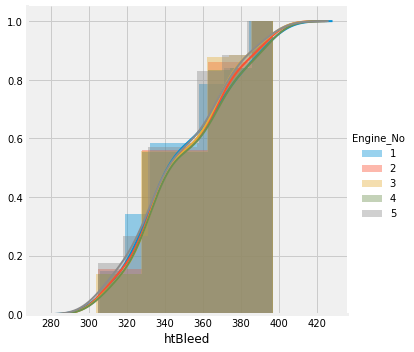

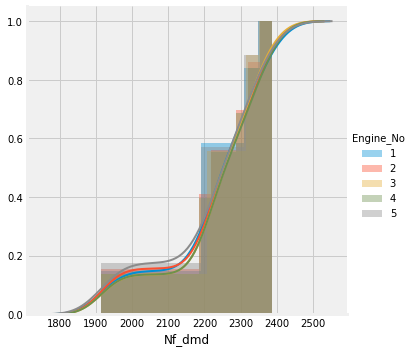

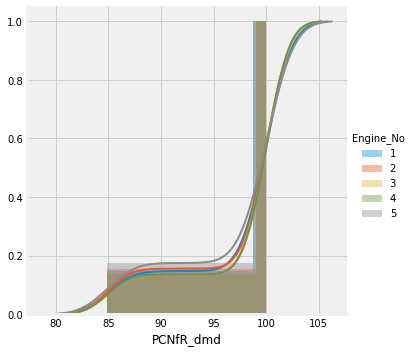

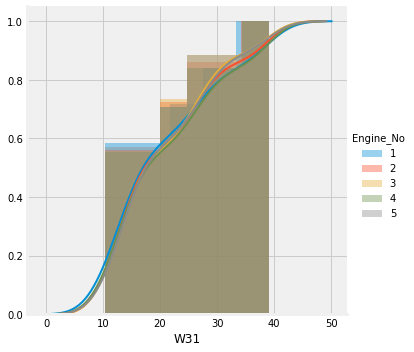

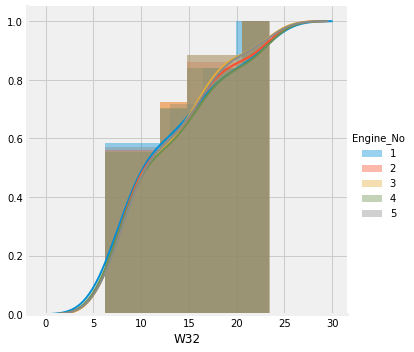

In [287]:
# plotting distribution plot for all features
for idx, feature in enumerate(list(df.columns)[2:-2]):
  fg = sns.FacetGrid(df, hue='Engine_No', size=5,sharey=False,sharex=False)
  fg.map(sns.distplot, feature,hist_kws={'cumulative': True},kde_kws={'cumulative': True,'linewidth':2}).add_legend() 
  plt.show()

- when we are comparing first five engines life cycle ,we can't tell difference between this engines all it's feature are looking same for PDF and CDF plots.

[0.06715155 0.15089566 0.24157815 0.19842259 0.11097677 0.09302628
 0.06424971 0.03431983 0.02555851 0.01382094]
[128. 153. 178. 203. 228. 253. 278. 303. 328. 353. 378.]


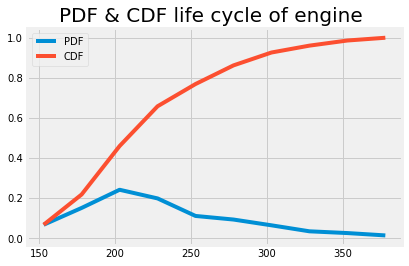

In [288]:
counts, bin_edges = np.histogram(train['max_No_cycles'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('PDF','CDF'))
plt.title('PDF & CDF life cycle of engine ',fontsize=20)
plt.show();

80 percent of engines are with in 400 life cycle.

- **pair plots for engines**

In [289]:
def plot_pair(df,idx1,idx2,engine_num=None,between= False, engine_id1=None,engine_id2=None):
    """
    plot simple pair plots for a df between columns [idx1,idx2]
    ===========================================================
    input: 
    df - (df)- Dataframe to plot the pairs for 
    idx1,2 - (int) columns index to plot [idx1:idx2] 
    engine_num - (int) engine number to selector 
    
    """  
    df = df.drop(['Time_in_cycles','Altitude','Mach_number','TRA','max_No_cycles','RUL'],axis=1) 
    sns.set()
    cols = df.iloc[:,idx1:idx2].columns.values.tolist()
    
    if engine_num == None:
      df_pair_plot = df.iloc[:,idx1:idx2]
      print('plotting pairs for all engines and columns: {}'.format(cols))
      sns.pairplot(df_pair_plot,diag_kind = 'kde',height=2.5);
    else:
      df_pair_plot = df[df['Engine_No']==engine_num].iloc[:,idx1:idx2]
      sns.pairplot(df_pair_plot,diag_kind = 'kde',height=2.5);
      print('plotting pairs for engine {} and columns: {}'.format(engine_num,cols))


In [290]:
def between_engines(df,engine_id1,engine_id2,idx1,idx2):
  ''' Between two engines and number of columes'''
  df_pair1 = train[train['Engine_No']==engine_id1]
  df_pair2 = train[train['Engine_No']==engine_id2]
  df_pair_plot = df_pair1.append(df_pair2)
  df_pair_plot.drop(['Time_in_cycles','Altitude','Mach_number','TRA','max_No_cycles','RUL'],axis=1) 
  sns.pairplot(df_pair_plot.iloc[:,np.r_[0,idx1:idx2]], diag_kind = 'kde', hue = 'Engine_No', markers=["o", "s"]) 

  print('Number of engine cycle:',format(df_pair1.shape[0]+1))
  print('Number of engine cycle:',format(df_pair2.shape[0]+1))

  print('plotting pairs for between engine {} and engine: {}'.format(engine_id1,engine_id2))


Number of engine cycle: 155
Number of engine cycle: 245
plotting pairs for between engine 5 and engine: 76


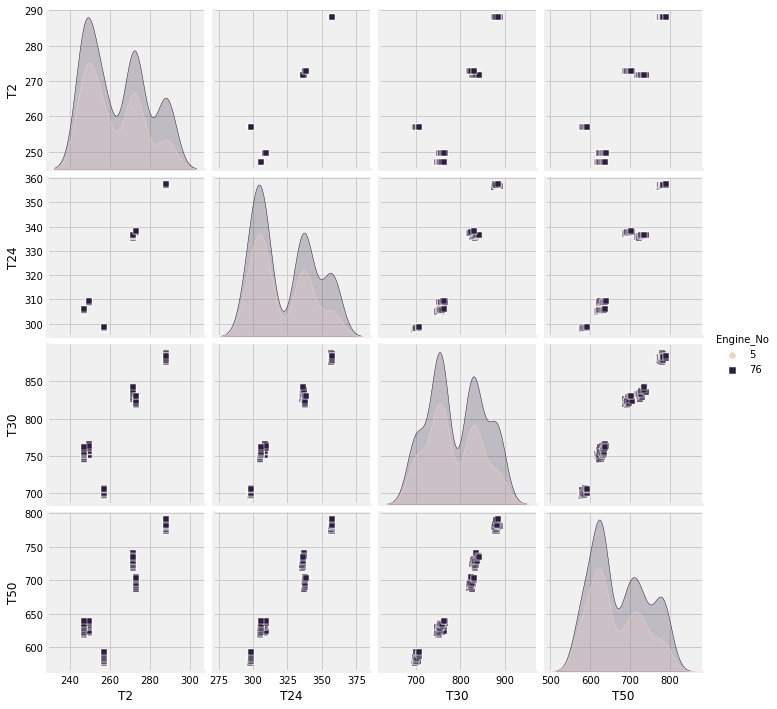

In [291]:
between_engines(train,5,76,5,9)

As we see pair plotes,number times entry temperature T2 (with range 270 to 300) is less for engine 76 when we comparing with engine 5.it may effects on engine life cycles.

In [292]:
def box_plot_between_engines(df,engine_id1,engine_id2,idx1,idx2):
  ''' Between two engines and number of columes'''
  df_pair1 = train[train['Engine_No']==engine_id1]
  df_pair2 = train[train['Engine_No']==engine_id2]
  df_pair_plot = df_pair1.append(df_pair2).drop(['Time_in_cycles','max_No_cycles','RUL'],axis=1) 
  df_long = pd.melt(df_pair_plot.iloc[:,np.r_[0,idx1:idx2]], "Engine_No", var_name="colmes", value_name="values") 
  sns.factorplot("colmes", hue="Engine_No", y="values", data=df_long, kind="boxen") 
  sns.factorplot("colmes", hue="Engine_No", y="values", data=df_long, kind="violin")
  
  print('Total Number of engine cycle:',format(df_pair1.shape[0]+1))
  print('Total Number of engine cycle:',format(df_pair2.shape[0]+1))
  print('Boxes for between engine {} and engine: {}'.format(engine_id1,engine_id2))

Total Number of engine cycle: 155
Total Number of engine cycle: 245
Boxes for between engine 5 and engine: 76


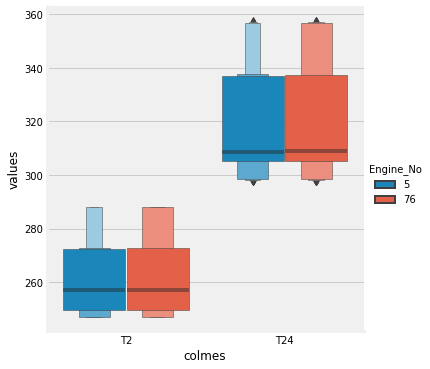

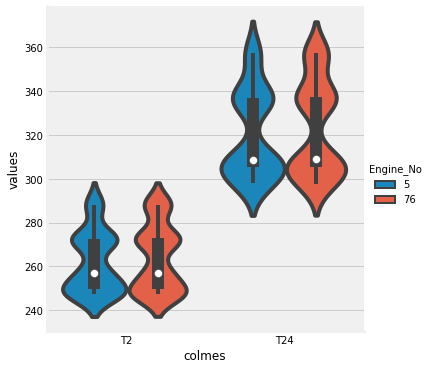

In [293]:
box_plot_between_engines(train,5,76,4,6)

- Box plot and violinplot not able differentiate between Min life cycle and Max life cycle. 

**TSNE**

In [294]:
df = train[train['Engine_No'] <=10]

In [295]:
lable = df['Engine_No']
df = df.drop(['Engine_No','Time_in_cycles','max_No_cycles','RUL'],axis=1)  

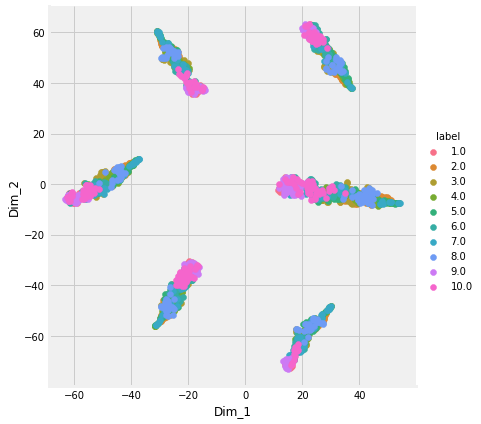

In [296]:
from sklearn.manifold import TSNE 
final_counts_dense = df
# Dimension reduction through T-SNE

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter =5000)
tsne = model.fit_transform(final_counts_dense) 

# creating a new data frame which help us in ploting the result data
tsne_df = np.vstack((tsne.T,lable)).T
eng_df = pd.DataFrame(data= tsne_df, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(eng_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

 
- T-SNE plot as we can see, we retrieve 6 clusters that are believed to be based on the operating condition.

- Splitting of data by its clusters means larger chances of overfitting and miscalculating probabilities. Because of this, we must attempt to merge our clusters together to have a better chance of understanding.

In [297]:
train.drop(['max_No_cycles'], axis=1, inplace=True) 
Test.drop(['max_No_cycles'],axis=1, inplace=True) 

In [298]:
train.to_csv('output/FD001/Predictive_Training_F0001.csv', encoding='utf-8',index = None) 
Test.to_csv('output/FD001/Predictive_Testing_F0001.csv', encoding='utf-8',index = None)  

**Classification:** we are aims to predict the probability that the equipment will fail within a pre specified time window. 

**Regression**

  A regression based approach to which aims to estimate the remaining time to the end of equipment’s useful life of a engine.

  The issue around extreme rare events such as engine breaks is the imbalanced  classes (breaking and working zones), that results in inaccurate predictions for the minority class when using regular supervised learning algorithms. So, in order to avoid it, we can transform the classification problem into a regression one by creating a regressive counter representing the RUL of each working zone.